In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv(r"D:\Codebase\Python\Data Cleaning\Data Cleansing Mastery. From Basics to Advanced [Project]\14_Project___\car_price.csv")
dataset.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,2016,1199 cc,5 Seats


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5505 non-null   object
 2   kms_driven           5507 non-null   object
 3   fuel_type            5509 non-null   object
 4   transmission         5508 non-null   object
 5   manufacture          5512 non-null   int64 
 6   engine               5504 non-null   object
 7   Seats                5507 non-null   object
dtypes: int64(1), object(7)
memory usage: 344.6+ KB


In [7]:
dataset.shape

(5512, 8)

In [8]:
dataset.isnull().sum()

car_name               0
car_prices_in_rupee    7
kms_driven             5
fuel_type              3
transmission           4
manufacture            0
engine                 8
Seats                  5
dtype: int64

In [9]:
(dataset.isnull().sum()/dataset.shape[0])*100

car_name               0.000000
car_prices_in_rupee    0.126996
kms_driven             0.090711
fuel_type              0.054427
transmission           0.072569
manufacture            0.000000
engine                 0.145138
Seats                  0.090711
dtype: float64

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset.isnull().sum()

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [12]:
########## Car Name ############

In [13]:
dataset['car_name']
x = dataset['car_name']

In [14]:
def company_name(x):
    return x[:x.index(" ")]

In [15]:
def car_modal(x):
    return x[x.index(" ")+1:]

In [16]:
dataset.insert(0, 'company_name', dataset['car_name'].apply(company_name))
dataset.insert(1, 'car_modal', dataset['car_name'].apply(car_modal))

In [17]:
dataset.head(3)

,company_name,car_modal,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,Jeep,Compass 2.0 Longitude Option BSIV,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,2017,1956 cc,5 Seats
1,Renault,Duster RXZ Turbo CVT,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,2021,1330 cc,5 Seats
2,Toyota,Camry 2.5 G,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,2016,2494 cc,5 Seats


In [18]:
#######  Car Price  #######

In [19]:
dataset['car_prices_in_rupee']

0       10.03 Lakh
1       12.83 Lakh
2       16.40 Lakh
3        7.77 Lakh
4        5.15 Lakh
           ...    
5507    28.90 Lakh
5508    64.90 Lakh
5509    13.75 Lakh
5510    29.90 Lakh
5511    31.90 Lakh
Name: car_prices_in_rupee, Length: 5482, dtype: object

In [20]:
dataset['car_prices_in_rupee'] = dataset['car_prices_in_rupee'].str.replace(",","")

In [21]:
def rupp_changer(xx):
    p = xx.split(" ")
    try :
        if(p[1] == "Lakh"):
            return str(round(float(p[0])*100000,1))
        elif(p[1] == "Crore"):
            return str(round(float(p[0])*10000000,1))
    except :
            return x

In [22]:
dataset['car_prices_in_rupee'] = dataset['car_prices_in_rupee'].apply(rupp_changer)

In [23]:
# Remove leading/trailing whitespace and replace any unexpected characters
dataset['car_prices_in_rupee'] = dataset['car_prices_in_rupee'].str.strip()
dataset['car_prices_in_rupee'] = dataset['car_prices_in_rupee'].str.replace(r'[^0-9.]', '', regex=True)

dataset['car_prices_in_rupee'] = pd.to_numeric(dataset['car_prices_in_rupee'], errors='coerce')

# Handle NaNs after conversion
dataset.dropna(subset=['car_prices_in_rupee'], inplace=True)  # Remove rows with NaN
# Or
dataset['car_prices_in_rupee'].fillna(0, inplace=True)  # Replace NaN with 0

C:\Users\vadik\AppData\Local\Temp\ipykernel_18564\4136576279.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['car_prices_in_rupee'].fillna(0, inplace=True)  # Replace NaN with 0


In [24]:
dataset['car_prices_in_rupee'] = dataset['car_prices_in_rupee'].astype("float")

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5359 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name         5359 non-null   object 
 1   car_modal            5359 non-null   object 
 2   car_name             5359 non-null   object 
 3   car_prices_in_rupee  5359 non-null   float64
 4   kms_driven           5359 non-null   object 
 5   fuel_type            5359 non-null   object 
 6   transmission         5359 non-null   object 
 7   manufacture          5359 non-null   int64  
 8   engine               5359 non-null   object 
 9   Seats                5359 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 460.5+ KB


In [26]:
########## Km Drive ###########

In [27]:
dataset['kms_driven']

0       86,226 kms
1       13,248 kms
2       60,343 kms
3       26,696 kms
4       69,414 kms
           ...    
5507    45,000 kms
5508    29,000 kms
5509    90,000 kms
5510    79,000 kms
5511    42,000 kms
Name: kms_driven, Length: 5359, dtype: object

In [28]:
def Kms_drivenn(x):
    return float(x.split()[0].replace(",", ""))

In [29]:
dataset['kms_driven'] = dataset['kms_driven'].apply(Kms_drivenn)

In [30]:
dataset.kms_driven.head()

0    86226.0
1    13248.0
2    60343.0
3    26696.0
4    69414.0
Name: kms_driven, dtype: float64

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5359 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name         5359 non-null   object 
 1   car_modal            5359 non-null   object 
 2   car_name             5359 non-null   object 
 3   car_prices_in_rupee  5359 non-null   float64
 4   kms_driven           5359 non-null   float64
 5   fuel_type            5359 non-null   object 
 6   transmission         5359 non-null   object 
 7   manufacture          5359 non-null   int64  
 8   engine               5359 non-null   object 
 9   Seats                5359 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 460.5+ KB


In [32]:
dataset.head()

,company_name,car_modal,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,Jeep,Compass 2.0 Longitude Option BSIV,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,2017,1956 cc,5 Seats
1,Renault,Duster RXZ Turbo CVT,Renault Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,2021,1330 cc,5 Seats
2,Toyota,Camry 2.5 G,Toyota Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,2016,2494 cc,5 Seats
3,Honda,Jazz VX CVT,Honda Jazz VX CVT,777000.0,26696.0,Petrol,Automatic,2018,1199 cc,5 Seats
4,Volkswagen,Polo 1.2 MPI Highline,Volkswagen Polo 1.2 MPI Highline,515000.0,69414.0,Petrol,Manual,2016,1199 cc,5 Seats


In [33]:
############  Engine  #############

In [34]:
dataset['engine'][0].split()[0]
# or
dataset['engine'] = dataset['engine'].str.replace(" cc","").astype("int32")

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5359 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name         5359 non-null   object 
 1   car_modal            5359 non-null   object 
 2   car_name             5359 non-null   object 
 3   car_prices_in_rupee  5359 non-null   float64
 4   kms_driven           5359 non-null   float64
 5   fuel_type            5359 non-null   object 
 6   transmission         5359 non-null   object 
 7   manufacture          5359 non-null   int64  
 8   engine               5359 non-null   int32  
 9   Seats                5359 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 568.6+ KB


In [36]:
###########  Seats  ###########

In [37]:
dataset['Seats'] = dataset['Seats'].str.replace(" Seats","").astype("int32")

In [38]:
dataset.head()

,company_name,car_modal,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,Jeep,Compass 2.0 Longitude Option BSIV,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,2017,1956,5
1,Renault,Duster RXZ Turbo CVT,Renault Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,2021,1330,5
2,Toyota,Camry 2.5 G,Toyota Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,2016,2494,5
3,Honda,Jazz VX CVT,Honda Jazz VX CVT,777000.0,26696.0,Petrol,Automatic,2018,1199,5
4,Volkswagen,Polo 1.2 MPI Highline,Volkswagen Polo 1.2 MPI Highline,515000.0,69414.0,Petrol,Manual,2016,1199,5


In [39]:
dataset.drop(columns=['car_name'], inplace=True)

In [40]:
########  Manufactoring Date ##########

In [41]:
dataset['manufacture']

0       2017
1       2021
2       2016
3       2018
4       2016
        ... 
5507    2018
5508    2015
5509    2013
5510    2015
5511    2017
Name: manufacture, Length: 5359, dtype: int64

In [42]:
# the above Data Cleaning is enough for a Data Anaylist

In [43]:
# but i think we are Cleaning this Data for Machine Learning 

In [44]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [45]:
dataset.head()

,company_name,car_modal,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,Jeep,Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,2017,1956,5
1,Renault,Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,2021,1330,5
2,Toyota,Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,2016,2494,5
3,Honda,Jazz VX CVT,777000.0,26696.0,Petrol,Automatic,2018,1199,5
4,Volkswagen,Polo 1.2 MPI Highline,515000.0,69414.0,Petrol,Manual,2016,1199,5


In [46]:
##########  Car Modal  ##########

In [47]:
car_modal_en = LabelEncoder()
dataset['car_modal'] = car_modal_en.fit_transform(dataset['car_modal'])

In [48]:
dataset.head()

,company_name,car_modal,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,Jeep,413,1003000.0,86226.0,Diesel,Manual,2017,1956,5
1,Renault,496,1283000.0,13248.0,Petrol,Automatic,2021,1330,5
2,Toyota,278,1640000.0,60343.0,Petrol,Automatic,2016,2494,5
3,Honda,889,777000.0,26696.0,Petrol,Automatic,2018,1199,5
4,Volkswagen,1064,515000.0,69414.0,Petrol,Manual,2016,1199,5


In [49]:
#########  Fuel Type #########

In [50]:
fuel_type_en = LabelEncoder()
dataset['fuel_type'] = fuel_type_en.fit_transform(dataset['fuel_type'])

In [51]:
dataset.head()

,company_name,car_modal,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,Jeep,413,1003000.0,86226.0,1,Manual,2017,1956,5
1,Renault,496,1283000.0,13248.0,4,Automatic,2021,1330,5
2,Toyota,278,1640000.0,60343.0,4,Automatic,2016,2494,5
3,Honda,889,777000.0,26696.0,4,Automatic,2018,1199,5
4,Volkswagen,1064,515000.0,69414.0,4,Manual,2016,1199,5


In [52]:
######### transmission

In [53]:
transmission_en = LabelEncoder()
dataset['transmission'] = transmission_en.fit_transform(dataset['transmission'])

In [54]:
dataset.head()

,company_name,car_modal,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,Jeep,413,1003000.0,86226.0,1,1,2017,1956,5
1,Renault,496,1283000.0,13248.0,4,0,2021,1330,5
2,Toyota,278,1640000.0,60343.0,4,0,2016,2494,5
3,Honda,889,777000.0,26696.0,4,0,2018,1199,5
4,Volkswagen,1064,515000.0,69414.0,4,1,2016,1199,5


In [55]:
#########  Company Name  #########

In [56]:
company_name_en = LabelEncoder()
dataset['company_name'] = company_name_en.fit_transform(dataset['company_name'])

In [57]:
dataset.head()

,company_name,car_modal,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,12,413,1003000.0,86226.0,1,1,2017,1956,5
1,26,496,1283000.0,13248.0,4,0,2021,1330,5
2,29,278,1640000.0,60343.0,4,0,2016,2494,5
3,8,889,777000.0,26696.0,4,0,2018,1199,5
4,30,1064,515000.0,69414.0,4,1,2016,1199,5


In [58]:
########  Cheacking Outlier and Removing it  #########

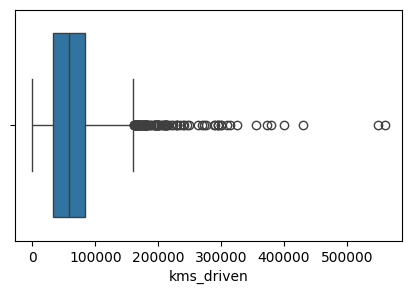

In [59]:
plt.figure(figsize=(5,3))
sns.boxplot(x="kms_driven",data=dataset)
plt.show()

In [60]:
##  i think we do not need to remove outlier because ther will be a lose of Data  ##

In [61]:
# If you want to use unsupervised Machine learning so, we have to use standard scaler I am Showing how to do it #

In [62]:
ss = StandardScaler()

new_data = pd.DataFrame(ss.fit_transform(dataset), columns=dataset.columns)

In [63]:
new_data.head()

,company_name,car_modal,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats
0,-0.424690,-0.915562,-0.092972,0.556649,-1.048527,0.634728,0.363844,0.725571,-0.347633
1,1.295579,-0.768494,0.048215,-1.184547,0.934436,-1.575478,1.440213,-0.351522,-0.347633
2,1.664208,-1.154770,0.228228,-0.060899,0.934436,-1.575478,0.094752,1.651251,-0.347633
3,-0.916196,-0.072134,-0.206929,-0.863689,0.934436,-1.575478,0.632936,-0.576920,-0.347633
4,1.787084,0.237950,-0.339040,0.155528,0.934436,0.634728,0.094752,-0.576920,-0.347633


In [64]:
###  Data CLeaning for Machine Learning Complected  ###
##  Now just Save your File ##

In [66]:
# new_data.to_csv('car_price_cleaned_data.csv', index=False)

# Run the above Code your File will be Saved #